In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from scipy.stats import ttest_ind



# Acá abajo tiene que completar el path de su computadora local que dirige al archivo, puede ser un archivo en drive o en la computadora.
# De ejemplo esta el path que yo usé para cargar la base desde drive.

file_path = "/content/drive/My Drive/PNUD/Data.csv"

data = pd.read_csv(file_path)

In [ ]:
# Limpieza de datos

# Eliminando los casos donde la inversión es estrictamente mayor a 100.000 directamente en 'data'
data_cleaned = data[data['¿Cuánto invertiste?'] <= 100000]

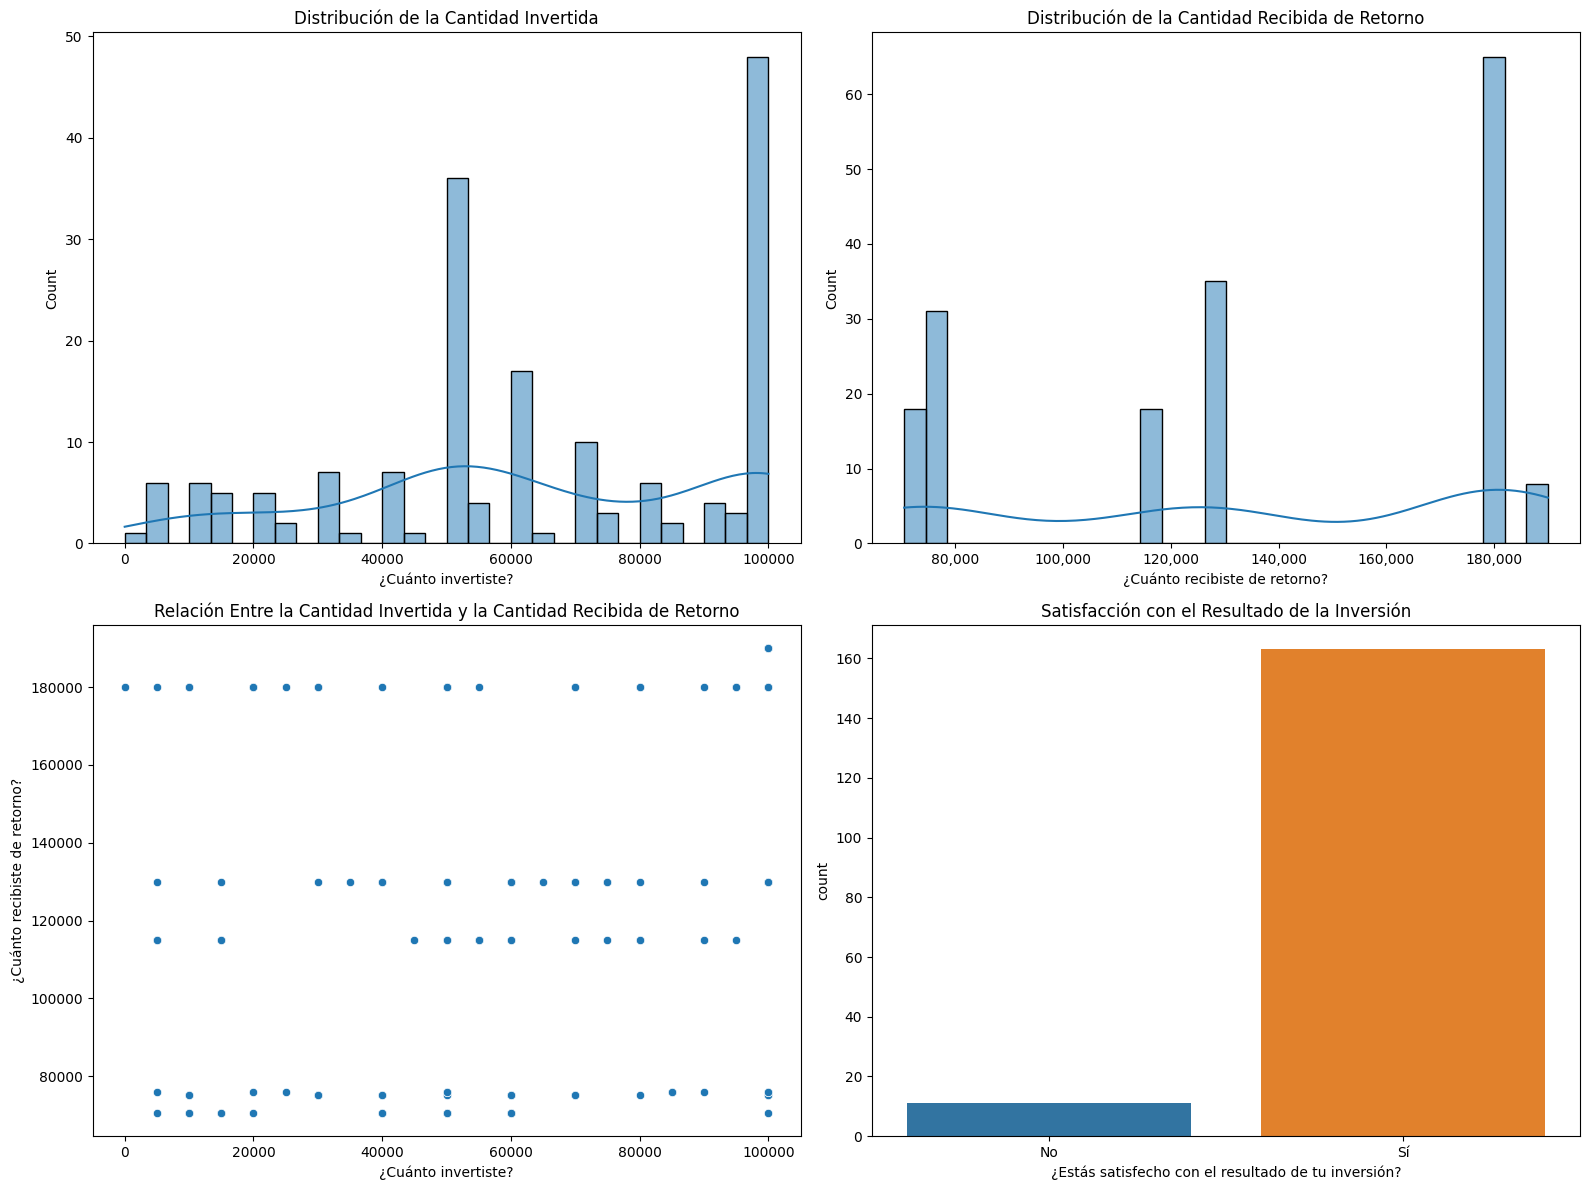

In [ ]:
# Preparar la distribución de la figura y las relaciones
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Distribución de la cantidad invertida
sns.histplot(data=data_cleaned, x="¿Cuánto invertiste?", bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribución de la Cantidad Invertida')

# Distribución de la cantidad recibida de retorno mostrando los valores completos con ceros
sns.histplot(data=data_cleaned, x="¿Cuánto recibiste de retorno?", bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribución de la Cantidad Recibida de Retorno')
# Formato de eje X para mostrar números completos con ceros
axes[0, 1].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
# Formato de eje Y para mostrar números completos con ceros
axes[0, 1].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Relación entre la cantidad invertida y la cantidad recibida de retorno
sns.scatterplot(data=data_cleaned, x="¿Cuánto invertiste?", y="¿Cuánto recibiste de retorno?", ax=axes[1, 0])
axes[1, 0].set_title('Relación Entre la Cantidad Invertida y la Cantidad Recibida de Retorno')

# Gráfico de barras para la variable categórica de satisfacción
sns.countplot(data=data_cleaned, x="¿Estás satisfecho con el resultado de tu inversión?", ax=axes[1, 1])
axes[1, 1].set_title('Satisfacción con el Resultado de la Inversión')

# Ajustar el layout de los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

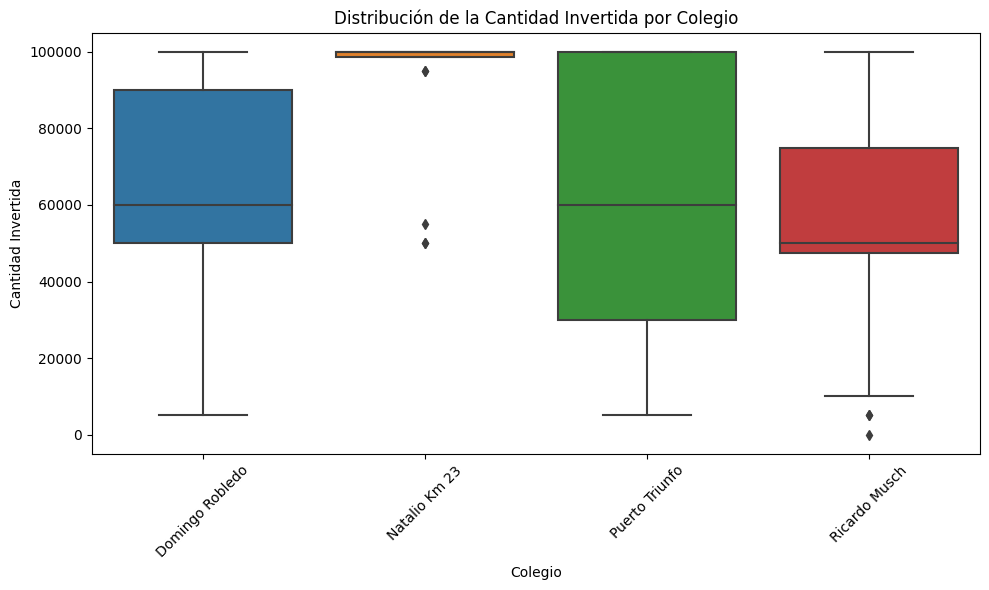

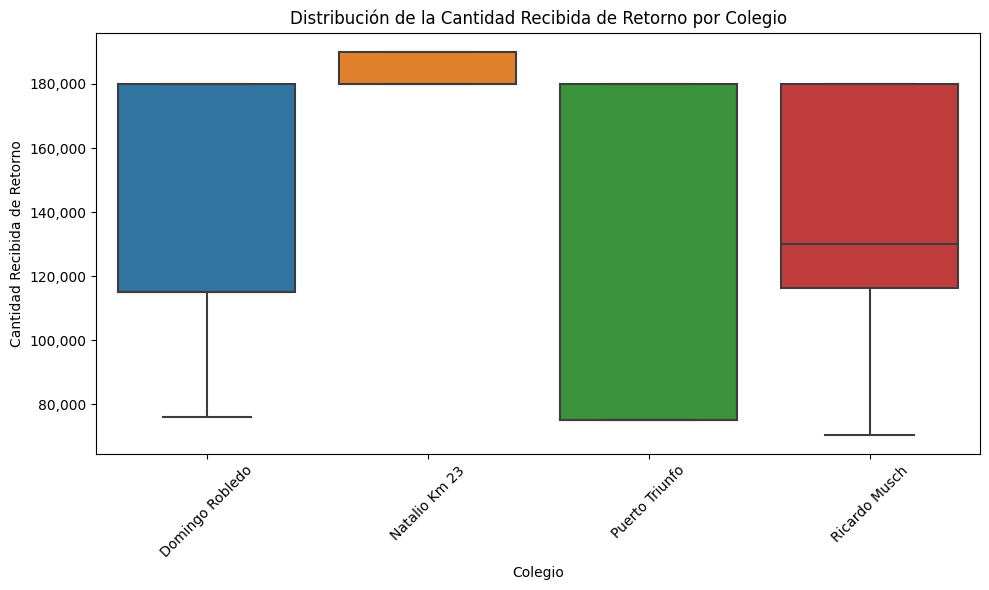

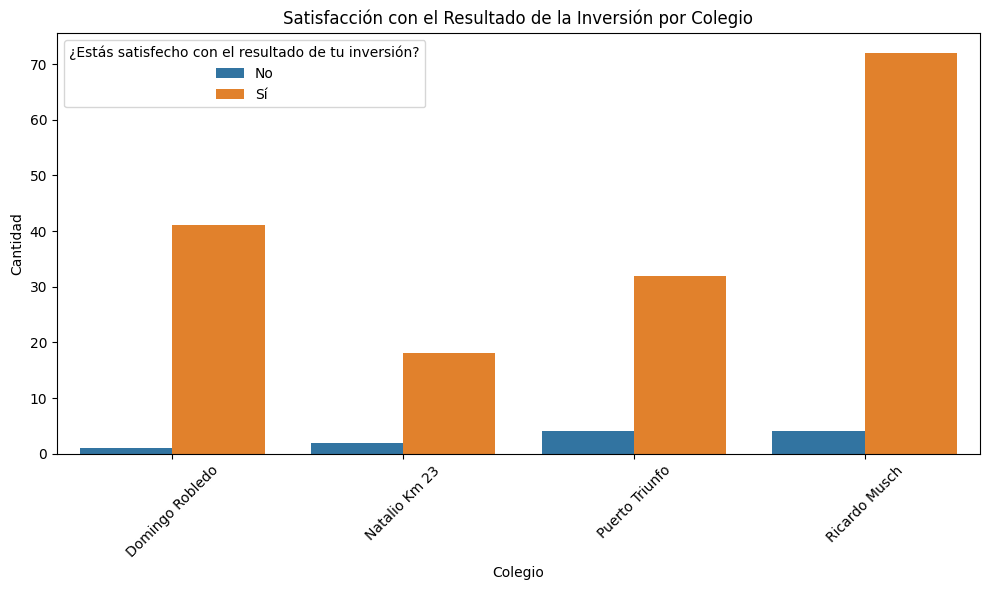

In [ ]:
# Análisis descriptivo de las inversiones y retornos por colegio.

# Gráfico de la distribución de la cantidad invertida por colegio
plt.figure(figsize=(10, 6))
invest_plot = sns.boxplot(data=data_cleaned, x='Colegio', y="¿Cuánto invertiste?")
invest_plot.set_title('Distribución de la Cantidad Invertida por Colegio')
invest_plot.set_xlabel('Colegio')
invest_plot.set_ylabel('Cantidad Invertida')
invest_plot.set_xticklabels(invest_plot.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

# Gráfico de la distribución de la cantidad recibida de retorno por colegio
plt.figure(figsize=(10, 6))
return_plot = sns.boxplot(data=data_cleaned, x='Colegio', y="¿Cuánto recibiste de retorno?")
return_plot.set_title('Distribución de la Cantidad Recibida de Retorno por Colegio')
return_plot.set_xlabel('Colegio')
return_plot.set_ylabel('Cantidad Recibida de Retorno')
return_plot.set_xticklabels(return_plot.get_xticklabels(), rotation=45)
return_plot.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.tight_layout()
plt.show()

# Gráfico de satisfacción con el resultado de la inversión por colegio
plt.figure(figsize=(10, 6))
satisfaction_plot = sns.countplot(data=data_cleaned, x='Colegio', hue="¿Estás satisfecho con el resultado de tu inversión?")
satisfaction_plot.set_title('Satisfacción con el Resultado de la Inversión por Colegio')
satisfaction_plot.set_xlabel('Colegio')
satisfaction_plot.set_ylabel('Cantidad')
satisfaction_plot.set_xticklabels(satisfaction_plot.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


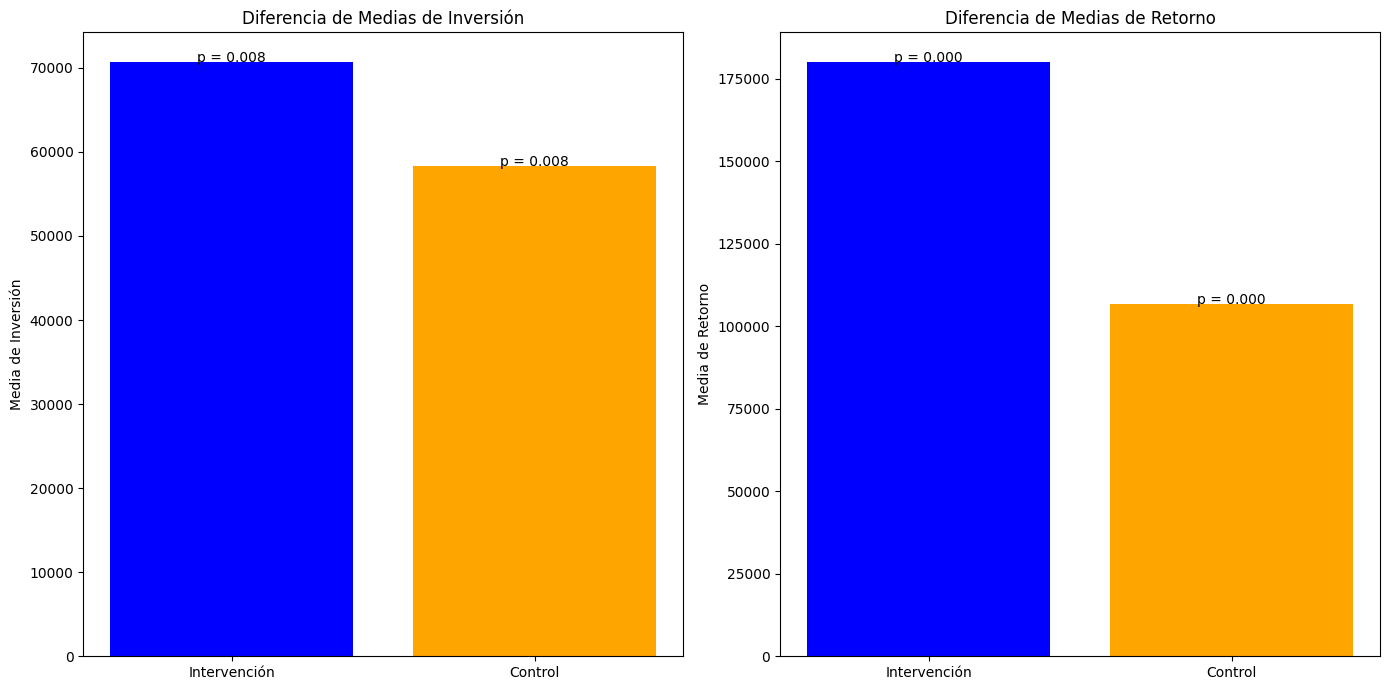

(2.6626384935816816,
 0.00848451306184487,
 17.085741192963756,
 5.5520347175270115e-39)

In [ ]:
# prueba t para comparar las medias de los dos grupos de la variable 'Clase'.

from scipy.stats import ttest_ind

# Separar los datos en grupos de tratamiento y control
grupo_tratamiento = data_cleaned[data_cleaned['Clase'] == 'Intervención']
grupo_control = data_cleaned[data_cleaned['Clase'] == 'Control']

# Calcular las medias de cada grupo para inversión y retorno
media_inversion_tratamiento = grupo_tratamiento['¿Cuánto invertiste?'].mean()
media_inversion_control = grupo_control['¿Cuánto invertiste?'].mean()
media_retorno_tratamiento = grupo_tratamiento['¿Cuánto recibiste de retorno?'].mean()
media_retorno_control = grupo_control['¿Cuánto recibiste de retorno?'].mean()

# Realizar la prueba t para las diferencias de medias
t_stat_inversion, p_val_inversion = ttest_ind(grupo_tratamiento['¿Cuánto invertiste?'].dropna(), grupo_control['¿Cuánto invertiste?'].dropna())
t_stat_retorno, p_val_retorno = ttest_ind(grupo_tratamiento['¿Cuánto recibiste de retorno?'].dropna(), grupo_control['¿Cuánto recibiste de retorno?'].dropna())

# Gráfico de diferencias de medias para inversión
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

ax[0].bar(['Intervención', 'Control'], [media_inversion_tratamiento, media_inversion_control], color=['blue', 'orange'])
ax[0].set_title('Diferencia de Medias de Inversión')
ax[0].set_ylabel('Media de Inversión')
ax[0].text(0, media_inversion_tratamiento, f'p = {p_val_inversion:.3f}', ha='center')
ax[0].text(1, media_inversion_control, f'p = {p_val_inversion:.3f}', ha='center')

# Gráfico de diferencias de medias para retorno
ax[1].bar(['Intervención', 'Control'], [media_retorno_tratamiento, media_retorno_control], color=['blue', 'orange'])
ax[1].set_title('Diferencia de Medias de Retorno')
ax[1].set_ylabel('Media de Retorno')
ax[1].text(0, media_retorno_tratamiento, f'p = {p_val_retorno:.3f}', ha='center')
ax[1].text(1, media_retorno_control, f'p = {p_val_retorno:.3f}', ha='center')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

# Resultados de las pruebas t
t_stat_inversion, p_val_inversion, t_stat_retorno, p_val_retorno

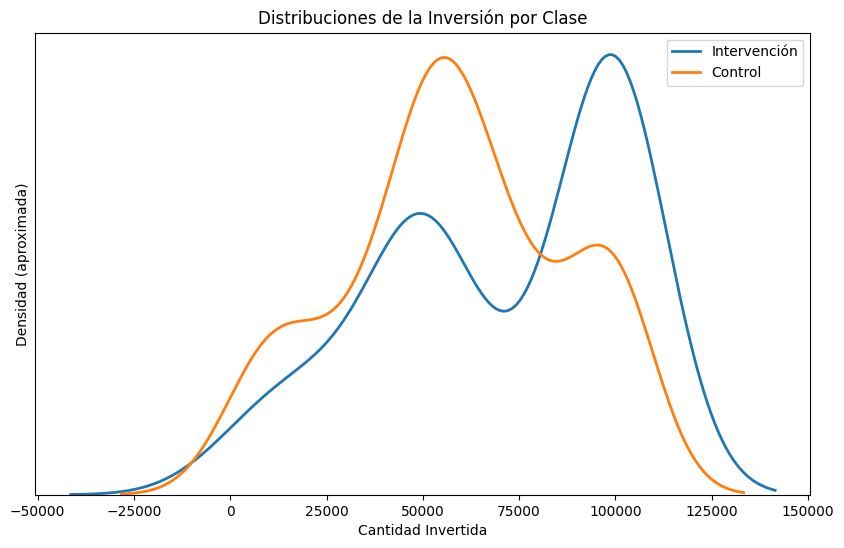

(31842.838223905954, 29812.767027962665)

In [ ]:
# Ajustando el gráfico de densidad para mejorar la comprensión del eje y
plt.figure(figsize=(10, 6))
ax = sns.kdeplot(data_cleaned[data_cleaned['Clase'] == 'Intervención']['¿Cuánto invertiste?'], label='Intervención', lw=2)
sns.kdeplot(data_cleaned[data_cleaned['Clase'] == 'Control']['¿Cuánto invertiste?'], label='Control', lw=2)

# Ajustando la escala y etiquetas del eje y
ax.set_yticks([])
plt.title('Distribuciones de la Inversión por Clase')
plt.xlabel('Cantidad Invertida')
plt.ylabel('Densidad (aproximada)')
plt.legend()

plt.show()

# Calculando el efecto del tratamiento sobre la cantidad invertida a partir de desviaciones estándar para cada grupo

desviacion_estandar_intervencion = data[data['Clase'] == 'Intervención']['¿Cuánto invertiste?'].std()
desviacion_estandar_control = data[data['Clase'] == 'Control']['¿Cuánto invertiste?'].std()

desviacion_estandar_intervencion, desviacion_estandar_control

In [ ]:
# Datos demograficos

file_path2 = "/content/drive/My Drive/PNUD/Demograficos.csv"
demo = pd.read_csv(file_path2)

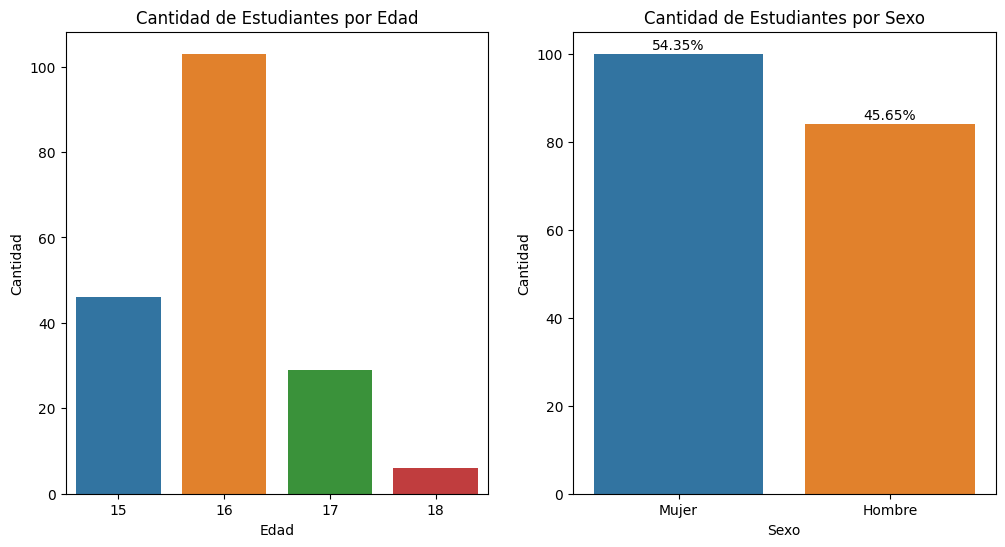

In [ ]:
# Filtrar solo los presentes (1)
data_presentes = demo[demo['Presente'] == 1]

# Gráfico de barras para la cantidad de personas por cada edad
plt.figure(figsize=(12, 6))

# Gráfico de barras para la edad
plt.subplot(1, 2, 1)
sns.countplot(x='Edad', data=data_presentes)
plt.title('Cantidad de Estudiantes por Edad')
plt.xlabel('Edad')
plt.ylabel('Cantidad')

# Gráfico de barras para el sexo con porcentajes
plt.subplot(1, 2, 2)
ax = sns.countplot(x='Sexo', data=data_presentes)
ax.set_xticklabels(['Mujer', 'Hombre'])
plt.title('Cantidad de Estudiantes por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad')

# Agregando porcentajes
total = len(data_presentes)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 1, '{:1.2f}%'.format(100 * height/total), ha="center")

plt.show()

In [ ]:
import numpy as np
from statsmodels.stats.power import TTestIndPower

# Creando una instancia de TTestIndPower
analysis = TTestIndPower()

# Calculando las medias para cada grupo
media_intervencion = data[data['Clase'] == 'Intervención']['¿Cuánto invertiste?'].mean()
media_control = data[data['Clase'] == 'Control']['¿Cuánto invertiste?'].mean()

# Diferencia de medias
diferencia_medias = media_intervencion - media_control

nivel_significancia = 0.05  # Nivel de significancia

# Calculando la varianza dentro de cada colegio para cada clase
varianzas_por_colegio = data.groupby(['Colegio', 'Clase'])['¿Cuánto invertiste?'].var()

# Promedio de las varianzas intra-bloque
varianza_intra_bloque = varianzas_por_colegio.mean()

# Ajustando el tamaño del efecto y el tamaño de muestra efectivo
# El tamaño del efecto se ajusta para tener en cuenta la varianza intra-bloque
tamaño_efecto_ajustado = diferencia_medias / np.sqrt(varianza_intra_bloque)

# El tamaño de muestra efectivo se ajusta considerando la correlación intra-bloque
# Asumiendo una correlación intra-bloque r, el tamaño de muestra efectivo para cada grupo se ajusta como:
# n_eff = n / (1 + (n - 1) * r)
# donde r es la correlación intra-bloque, estimada como varianza_intra_bloque / varianza_total
varianza_total = data['¿Cuánto invertiste?'].var()
r = varianza_intra_bloque / varianza_total
n_eff_intervencion = tamaño_muestra_intervencion / (1 + (tamaño_muestra_intervencion - 1) * r)
n_eff_control = tamaño_muestra_control / (1 + (tamaño_muestra_control - 1) * r)

# Recalculando el poder estadístico con los valores ajustados
poder_estadistico_ajustado = analysis.solve_power(effect_size=tamaño_efecto_ajustado,
                                                  nobs1=n_eff_intervencion,
                                                  alpha=nivel_significancia,
                                                  ratio=n_eff_control / n_eff_intervencion,
                                                  alternative='two-sided')

varianza_intra_bloque, tamaño_efecto_ajustado, n_eff_intervencion, n_eff_control, poder_estadistico_ajustado

# Realizando un print con una descripción en lenguaje natural

print(f"El tamaño del efecto calculado es {tamaño_efecto_ajustado:.3f}, que es una medida estandarizada de la magnitud del efecto del tratamiento.")

print(f"El poder estadístico del análisis es {poder_estadistico_ajustado:.3f}, lo que significa que hay una probabilidad del {poder_estadistico_ajustado * 100:.1f}% de detectar un efecto real si realmente existiera uno, considerando el tamaño actual de la muestra, la varianza intrabloque y un nivel de significancia de 0.05%.")

El tamaño del efecto calculado es 0.400, que es una medida estandarizada de la magnitud del efecto del tratamiento.
El poder estadístico del análisis es 0.051, lo que significa que hay una probabilidad del 5.1% de detectar un efecto real si realmente existiera uno, considerando el tamaño actual de la muestra, la varianza intrabloque y un nivel de significancia de 0.05%.


In [ ]:
import plotly.graph_objects as go

# Agrupa y suma los montos invertidos
satisfaccion = data_cleaned.groupby(['¿Estás satisfecho con el resultado de tu inversión?',
                             '¿Si volvieras a hacerlo, invertirías un monto mayor, igual o menor? '])['¿Cuánto invertiste?'].sum().reset_index()

# Mapea las categorías a números para las fuentes y los destinos
satisfaccion_map = {v: i for i, v in enumerate(satisfaccion['¿Estás satisfecho con el resultado de tu inversión?'].unique())}
intencion_map = {v: i + len(satisfaccion_map) for i, v in enumerate(satisfaccion['¿Si volvieras a hacerlo, invertirías un monto mayor, igual o menor? '].unique())}

# Crea las listas de fuentes, destinos y montos
source = satisfaccion['¿Estás satisfecho con el resultado de tu inversión?'].map(satisfaccion_map)
target = satisfaccion['¿Si volvieras a hacerlo, invertirías un monto mayor, igual o menor? '].map(intencion_map)
value = satisfaccion['¿Cuánto invertiste?']

# Crear el gráfico Sankey
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=list(satisfaccion_map.keys()) + list(intencion_map.keys()),
    ),
    link=dict(
        source=source,
        target=target,
        value=value
    ))])

fig.update_layout(title_text="Flujo de Montos Invertidos: Satisfacción con lo Invertido e Intención de Inversión Futura", font_size=10)
fig.show()


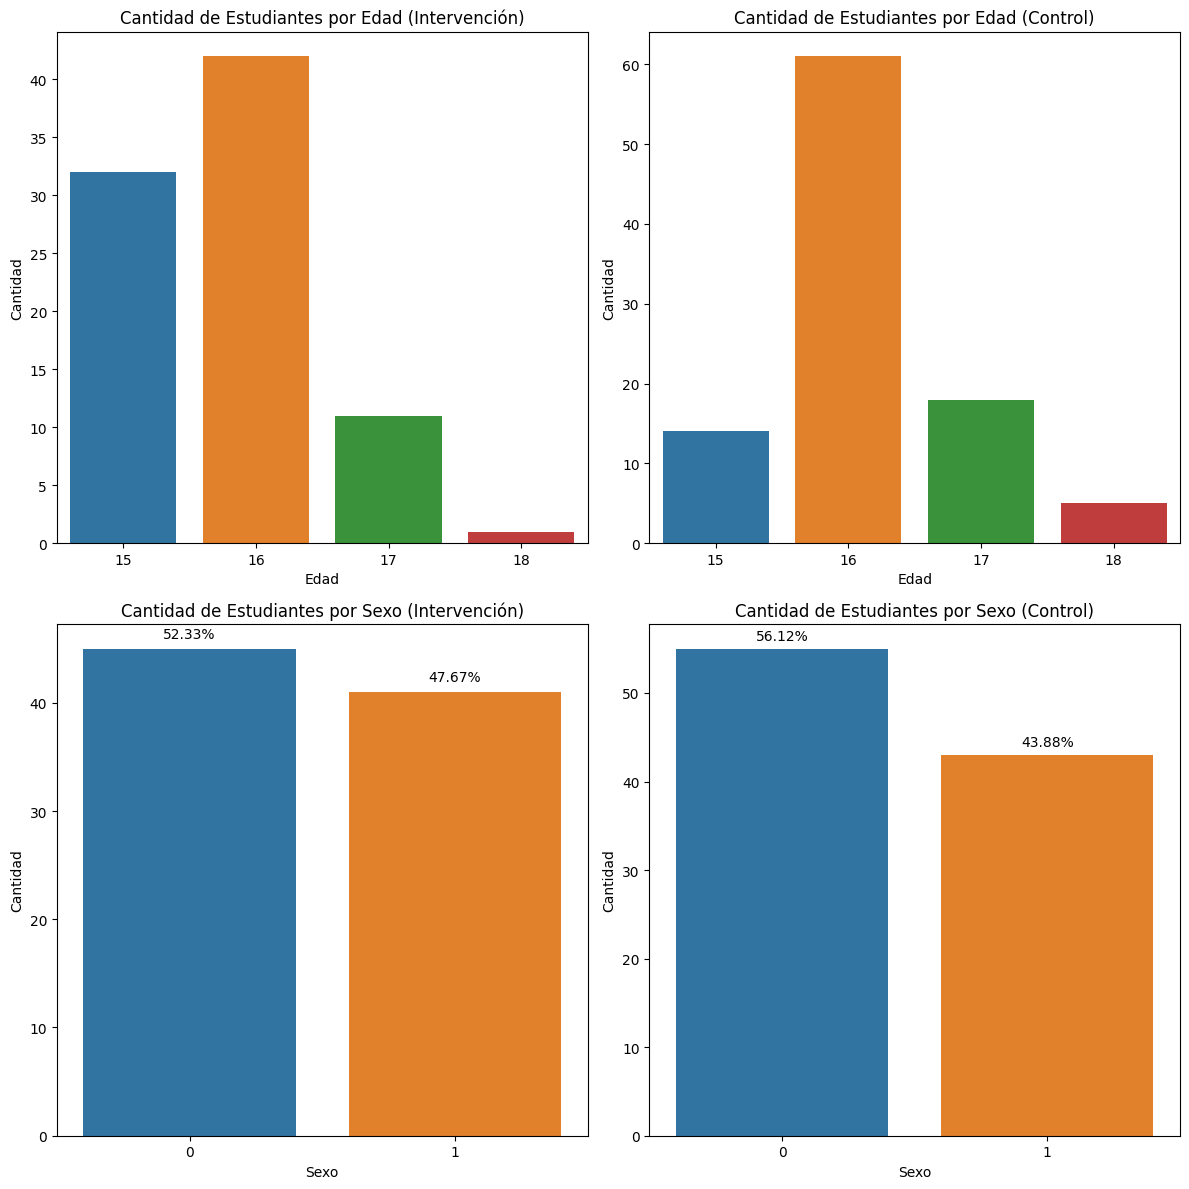

In [ ]:
# Preparar la figura para los gráficos
plt.figure(figsize=(12, 12))

# Gráfico de barras para la cantidad de personas por edad dividido por 'Clase'
plt.subplot(2, 2, 1)
sns.countplot(x='Edad', data=demo[demo['Clase'] == 'treatment'])
plt.title('Cantidad de Estudiantes por Edad (Intervención)')
plt.xlabel('Edad')
plt.ylabel('Cantidad')

plt.subplot(2, 2, 2)
sns.countplot(x='Edad', data=demo[demo['Clase'] == 'control'])
plt.title('Cantidad de Estudiantes por Edad (Control)')
plt.xlabel('Edad')
plt.ylabel('Cantidad')

# Gráfico de barras para el sexo con porcentajes, dividido por 'Clase'
plt.subplot(2, 2, 3)
ax_intervencion = sns.countplot(x='Sexo', data=demo[demo['Clase'] == 'treatment'])
ax_intervencion.set_title('Cantidad de Estudiantes por Sexo (Intervención)')
ax_intervencion.set_xlabel('Sexo')
ax_intervencion.set_ylabel('Cantidad')
# Agregar porcentajes para Intervención
total_intervencion = len(demo[demo['Clase'] == 'treatment'])
for p in ax_intervencion.patches:
    height = p.get_height()
    ax_intervencion.text(p.get_x() + p.get_width()/2., height + 1, '{:1.2f}%'.format(100 * height/total_intervencion), ha="center")

plt.subplot(2, 2, 4)
ax_control = sns.countplot(x='Sexo', data=demo[demo['Clase'] == 'control'])
ax_control.set_title('Cantidad de Estudiantes por Sexo (Control)')
ax_control.set_xlabel('Sexo')
ax_control.set_ylabel('Cantidad')
# Agregar porcentajes para Control
total_control = len(demo[demo['Clase'] == 'control'])
for p in ax_control.patches:
    height = p.get_height()
    ax_control.text(p.get_x() + p.get_width()/2., height + 1, '{:1.2f}%'.format(100 * height/total_control), ha="center")

plt.tight_layout()
plt.show()

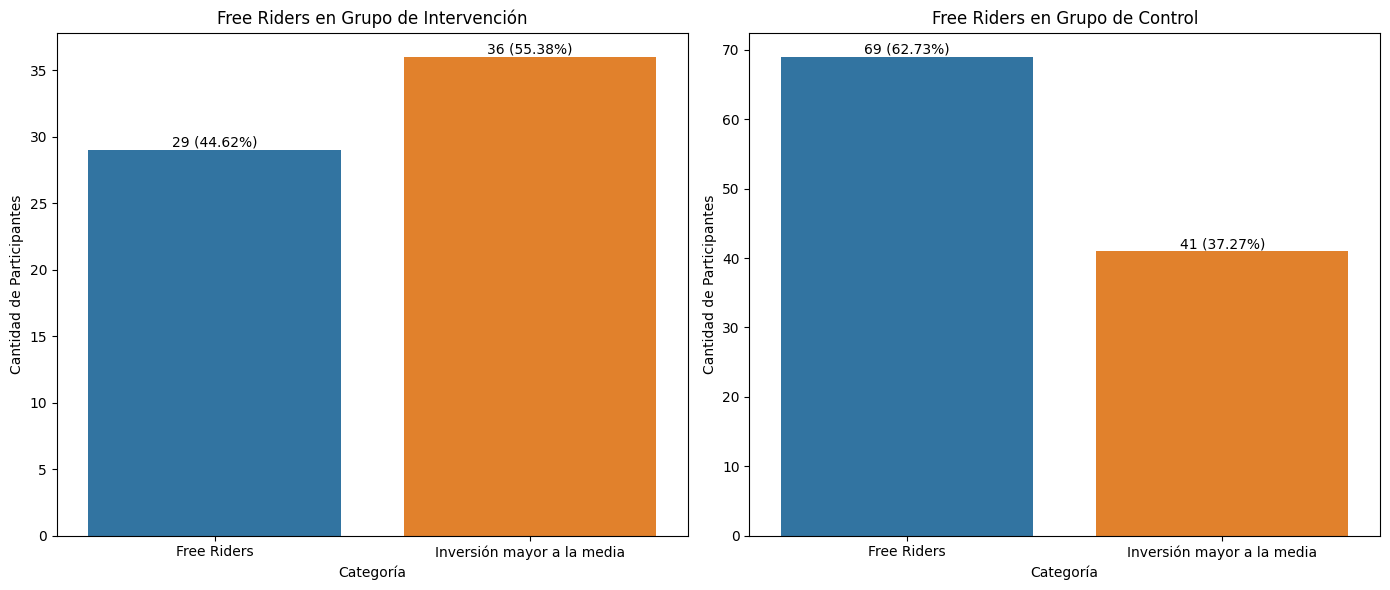

In [ ]:
# Vamos a crear gráficos de barras para la cantidad de "free riders" divididos por la variable binaria 'Clase'.

# Calculamos la media de inversión nuevamente
media_inversion = data_cleaned['¿Cuánto invertiste?'].mean()


# Identificamos los "free riders" como aquellos que invirtieron menos que la media en cada grupo de 'Clase'
free_riders_intervencion = data_cleaned[(data_cleaned['Clase'] == 'Intervención') & (data_cleaned['¿Cuánto invertiste?'] < media_inversion)]
free_riders_control = data_cleaned[(data_cleaned['Clase'] == 'Control') & (data_cleaned['¿Cuánto invertiste?'] < media_inversion)]

# Calculamos la cantidad de free riders en cada grupo
cantidad_free_riders_intervencion = len(free_riders_intervencion)
cantidad_free_riders_control = len(free_riders_control)

# Calculamos la cantidad total en cada grupo
total_intervencion = len(data_cleaned[data_cleaned['Clase'] == 'Intervención'])
total_control = len(data_cleaned[data_cleaned['Clase'] == 'Control'])

# Preparamos los datos para el gráfico
categorias = ['Free Riders', 'Inversión mayor a la media']
cantidades_intervencion = [cantidad_free_riders_intervencion, total_intervencion - cantidad_free_riders_intervencion]
cantidades_control = [cantidad_free_riders_control, total_control - cantidad_free_riders_control]

# Creamos los gráficos de barras para cada grupo
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico para el grupo de intervención
sns.barplot(ax=axes[0], x=categorias, y=cantidades_intervencion)
axes[0].set_title('Free Riders en Grupo de Intervención')
axes[0].set_ylabel('Cantidad de Participantes')
axes[0].set_xlabel('Categoría')

# Mostrando las cantidades y proporciones en el gráfico de intervención
for i, cantidad in enumerate(cantidades_intervencion):
    axes[0].text(i, cantidad, f'{cantidad} ({cantidad / total_intervencion * 100:.2f}%)', ha='center', va='bottom')

# Gráfico para el grupo de control
sns.barplot(ax=axes[1], x=categorias, y=cantidades_control)
axes[1].set_title('Free Riders en Grupo de Control')
axes[1].set_ylabel('Cantidad de Participantes')
axes[1].set_xlabel('Categoría')

# Mostrando las cantidades y proporciones en el gráfico de control
for i, cantidad in enumerate(cantidades_control):
    axes[1].text(i, cantidad, f'{cantidad} ({cantidad / total_control * 100:.2f}%)', ha='center', va='bottom')

plt.tight_layout()
plt.show()

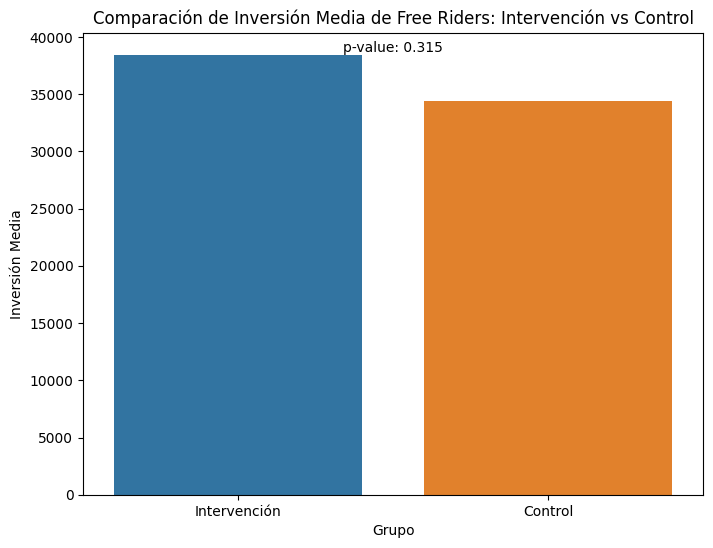

In [ ]:
# Calcula la media de inversión para el grupo de control
media_inversion_control = data[data['Clase'] == 'Control']['¿Cuánto invertiste?'].mean()

# Identifica los "free riders" en cada grupo de 'Clase'
free_riders_intervencion = data[(data['Clase'] == 'Intervención') & (data['¿Cuánto invertiste?'] < media_inversion_control)]
free_riders_control = data[(data['Clase'] == 'Control') & (data['¿Cuánto invertiste?'] < media_inversion_control)]

# Realiza la prueba t
t_stat, p_value = ttest_ind(free_riders_intervencion['¿Cuánto invertiste?'],
                            free_riders_control['¿Cuánto invertiste?'],
                            equal_var=False)  # Asumiendo varianzas no iguales

# Calcula las medias de inversión de free riders en los grupos de tratamiento y control para el gráfico
media_free_riders_intervencion = free_riders_intervencion['¿Cuánto invertiste?'].mean()
media_free_riders_control = free_riders_control['¿Cuánto invertiste?'].mean()

# Crea el gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=['Intervención', 'Control'], y=[media_free_riders_intervencion, media_free_riders_control])
plt.title('Comparación de Inversión Media de Free Riders: Intervención vs Control')
plt.ylabel('Inversión Media')
plt.xlabel('Grupo')

# Muestra el p-value en el gráfico
plt.text(0.5, max([media_free_riders_intervencion, media_free_riders_control]), f'p-value: {p_value:.3f}', ha='center', va='bottom')

plt.show()

In [ ]:
import plotly.graph_objects as go

# Agrupar y contar la cantidad de casos
satisfaccion_count = data_cleaned.groupby(['¿Estás satisfecho con el resultado de tu inversión?',
                             '¿Si volvieras a hacerlo, invertirías un monto mayor, igual o menor? ']).size().reset_index(name='Cantidad')

# Mapear las categorías a números para las fuentes y los destinos
satisfaccion_map = {v: i for i, v in enumerate(satisfaccion_count['¿Estás satisfecho con el resultado de tu inversión?'].unique())}
intencion_map = {v: i + len(satisfaccion_map) for i, v in enumerate(satisfaccion_count['¿Si volvieras a hacerlo, invertirías un monto mayor, igual o menor? '].unique())}

# Crear las listas de fuentes, destinos y cantidades
source = satisfaccion_count['¿Estás satisfecho con el resultado de tu inversión?'].map(satisfaccion_map)
target = satisfaccion_count['¿Si volvieras a hacerlo, invertirías un monto mayor, igual o menor? '].map(intencion_map)
value = satisfaccion_count['Cantidad']

# Crear el gráfico Sankey
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=list(satisfaccion_map.keys()) + list(intencion_map.keys()),
    ),
    link=dict(
        source=source,
        target=target,
        value=value
    ))])

fig.update_layout(title_text="Flujo de Casos: Satisfacción con lo Invertido e Intención de Inversión Futura", font_size=10)
fig.show()


In [ ]:
from scipy.stats import ttest_ind

# Realizar una prueba t de Student para comparar las edades medias en los grupos de tratamiento y control
edades_tratamiento = demo[demo['Clase'] == 'treatment']['Edad']
edades_control = demo[demo['Clase'] == 'control']['Edad']
t_stat, p_value = ttest_ind(edades_tratamiento, edades_control, equal_var=False)

print("Estadístico t:", t_stat)
print("Valor p:", p_value)


Estadístico t: -3.4505634242786476
Valor p: 0.000697428352874587
